<a href="https://colab.research.google.com/github/21millionforever/Algorithm-Visualizer/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import KFold, StratifiedKFold

In [191]:
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [192]:
# Check if we have null value in the dataset
df.isnull().sum().max()

0

In [193]:
# The dataset is extremly imbalanced
fraud_num = df['Class'].value_counts()[0]
non_fraud_num = df['Class'].value_counts()[1]
print("The total number of fraud transactions: {}".format(fraud_num))
print("The total number of non-fraud transactions: {}".format(non_fraud_num))
print("Fraud rate: {}%".format(round(fraud_num/len(df) * 100, 2)))
print("Non-fraud rate: {}%".format(round(non_fraud_num/len(df) * 100, 2)))

The total number of fraud transactions: 284315
The total number of non-fraud transactions: 492
Fraud rate: 99.83%
Non-fraud rate: 0.17%


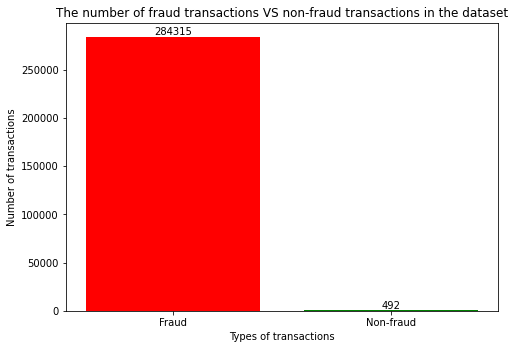

In [194]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.array(['Fraud', 'Non-fraud'])
y = np.array([fraud_num, non_fraud_num])
bar_color = np.array(['red','green'])
ax.bar(x, height = y, color = bar_color)

for i in range(len(x)):
  plt.text(i,y[i], y[i], ha="center", va="bottom")
plt.title("The number of fraud transactions VS non-fraud transactions in the dataset")
plt.xlabel("Types of transactions")
plt.ylabel("Number of transactions")
plt.show()



In [195]:
# Task 1:
# 做一个百分比圆环图来展示Fraud和Non-fraud在我们dataset里面的占比




In [196]:
# Sacle the data
# Since Columns V1 to V28 are already scaled, we only need to scale columns time and amount
rob_scaler = RobustScaler()
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
amount_column = df.pop('Amount')
df.insert(1,"Amount", amount_column)
print(df.head())

       Time    Amount        V1        V2        V3        V4        V5  \
0 -0.994983  1.783274 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 -0.994983 -0.269825  1.191857  0.266151  0.166480  0.448154  0.060018   
2 -0.994972  4.983721 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 -0.994972  1.418291 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 -0.994960  0.670579 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8  ...       V20       V21       V22       V23  \
0  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672  0.101288   
2  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679  0.909412   
3  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  
0  0.06

In [198]:
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


for train_index, test_index in sss.split(X, y):
    # print("Train:", len(train_index), "Test:", len(test_index)) # Train: 227845 Test: 56962
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    # print(type(original_ytrain))
    # print(type(original_ytrain.values))
    # Turn into an array
    original_Xtrain = original_Xtrain.values
    original_Xtest = original_Xtest.values
    original_ytrain = original_ytrain.values
    original_ytest = original_ytest.values

    df = df.sample(frac=1)

    # amount of fraud classes 492 rows.
    fraud_df = df.loc[df['Class'] == 1]
    non_fraud_df = df.loc[df['Class'] == 0][:492]

    normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

    # Shuffle dataframe rows
    new_df = normal_distributed_df.sample(frac=1, random_state=42)
    print(new_df.head())
    new_X = new_df.drop('Class', axis=1)
    new_y = new_df['Class']




            Time    Amount         V1         V2         V3        V4  \
9705   -0.825021 -0.098512   1.303975  -0.258310  -0.721635 -0.854541   
243393  0.789765 -0.307273  -5.488032   3.329561  -5.996296  3.601720   
78402  -0.319341  7.985188   0.339087  -2.318275  -1.010969 -0.444308   
243699  0.791175 -0.293440  -4.320609   3.199939  -5.799736  6.502330   
15225  -0.682656  1.089779 -19.856322  12.095893 -22.464083  6.115541   

               V5        V6         V7         V8  ...       V20       V21  \
9705     1.701450  3.425969  -1.015053   0.794230  ...  0.044627 -0.119766   
243393  -2.023926 -1.737393  -4.396859   0.228394  ... -0.551121  1.719631   
78402   -0.729891  0.116549   0.425298  -0.269892  ...  1.329564  0.487281   
243699   0.378479 -1.948246  -2.167860  -0.728207  ... -0.263686  0.476660   
15225  -15.148022 -4.346724 -15.648507  13.276805  ...  1.582930  1.750730   

             V22       V23       V24       V25       V26       V27       V28  \
9705   -0.23